In [27]:
import numpy as np
from scipy.linalg import expm

np.set_printoptions(precision=2, suppress=True, threshold=5)

from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [28]:
L = np.array([
    [-150, 150, 162],
    [0, 120, 0],
]) / 1000.

Q = np.cumsum(L, axis=0)
print(f"Q: {Q}")

W = np.array([
    [0, 0, 1],
    [0, 0, 1]
])
print(f"W: {W}")

V = -np.cross(W, Q)
print(f"V: {V}")

M_p = np.array([40, 41, 22]) / 1000.
M = np.array([
    [1, 0, 0, M_p[0]],
    [0, 1, 0, M_p[1]],
    [0, 0, 1, M_p[2]],
    [0, 0, 0, 1]
])

S = np.zeros((len(L), 4, 4))
for i in range(len(L)):
    S[i] = np.array([
        [0, -W[i][2], W[i][1], V[i][0]],
        [W[i][2], 0, -W[i][0], V[i][1]],
        [-W[i][1], W[i][0], 0, V[i][2]],
        [0, 0, 0, 0]
        
    ])
print(f"S: {S}")

Q: [[-0.15  0.15  0.16]
 [-0.15  0.27  0.16]]
W: [[0 0 1]
 [0 0 1]]
V: [[ 0.15  0.15 -0.  ]
 [ 0.27  0.15 -0.  ]]
S: [[[ 0.   -1.    0.    0.15]
  [ 1.    0.    0.    0.15]
  [ 0.    0.    0.   -0.  ]
  [ 0.    0.    0.    0.  ]]

 [[ 0.   -1.    0.    0.27]
  [ 1.    0.    0.    0.15]
  [ 0.    0.    0.   -0.  ]
  [ 0.    0.    0.    0.  ]]]


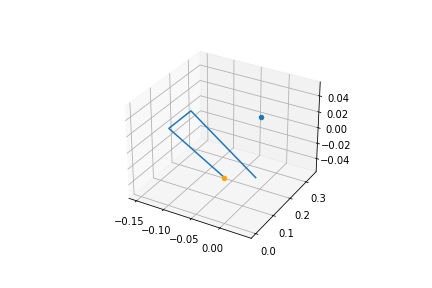

In [29]:
thetas = np.radians(np.array([90, 0]))

T = np.zeros((len(L), 4, 4))
for i in range(len(L)):
    T[i] = expm(S[i]*thetas[i])
# print(f"T: {T}")

T_M = M
for i in range(len(L)):
    T_M = T[i] @ T_M
# print(f"T_M: {T_M}")

xplot = np.array([0, Q[0][0], Q[1][0], M[0][3]])
yplot = np.array([0, Q[0][1], Q[1][1], M[1][3]])
yplot = np.array([0, Q[0][2], Q[1][2], M[3][3]])

fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.set_aspect('equal', adjustable='box')
ax.scatter3D(0, 0, 0, c='orange')
ax.plot3D(xplot, yplot, np.zeros_like(xplot))

ax.scatter3D(T_M[0][3], T_M[1][3])
